In [1]:
import pandas as pd
import numpy as np
from sklearn.impute import SimpleImputer
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

## Load data

In [2]:
df = pd.read_csv("loan_approval_data.csv")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 20 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Applicant_ID        950 non-null    float64
 1   Applicant_Income    950 non-null    float64
 2   Coapplicant_Income  950 non-null    float64
 3   Employment_Status   950 non-null    object 
 4   Age                 950 non-null    float64
 5   Marital_Status      950 non-null    object 
 6   Dependents          950 non-null    float64
 7   Credit_Score        950 non-null    float64
 8   Existing_Loans      950 non-null    float64
 9   DTI_Ratio           950 non-null    float64
 10  Savings             950 non-null    float64
 11  Collateral_Value    950 non-null    float64
 12  Loan_Amount         950 non-null    float64
 13  Loan_Term           950 non-null    float64
 14  Loan_Purpose        950 non-null    object 
 15  Property_Area       950 non-null    object 
 16  Educati

In [3]:
df.isnull().sum()

Applicant_ID          50
Applicant_Income      50
Coapplicant_Income    50
Employment_Status     50
Age                   50
Marital_Status        50
Dependents            50
Credit_Score          50
Existing_Loans        50
DTI_Ratio             50
Savings               50
Collateral_Value      50
Loan_Amount           50
Loan_Term             50
Loan_Purpose          50
Property_Area         50
Education_Level       50
Gender                50
Employer_Category     50
Loan_Approved         50
dtype: int64

### Seperating categorical and numerical cols to handle missing Values

In [4]:
categorical_col = df.select_dtypes(include = ["object"]).columns
numerical_col = df.select_dtypes(include = ["number"]).columns

num_mean = SimpleImputer(strategy="mean")
df[numerical_col] = num_mean.fit_transform(df[numerical_col])

cat_mode = SimpleImputer(strategy='most_frequent')
df[categorical_col] = cat_mode.fit_transform(df[categorical_col])

df.head()

,Applicant_ID,Applicant_Income,Coapplicant_Income,Employment_Status,Age,Marital_Status,Dependents,Credit_Score,Existing_Loans,DTI_Ratio,Savings,Collateral_Value,Loan_Amount,Loan_Term,Loan_Purpose,Property_Area,Education_Level,Gender,Employer_Category,Loan_Approved
0,1.0,17795.0,1387.0,Salaried,51.0,Married,0.0,637.0,4.0,0.53,19403.0,45638.0,16619.0,84.0,Personal,Urban,Not Graduate,Female,Private,No
1,2.0,2860.0,2679.0,Salaried,46.0,Married,3.0,621.0,2.0,0.30,2580.0,49272.0,38687.0,48.0,Car,Semiurban,Graduate,Male,Private,No
2,3.0,7390.0,2106.0,Salaried,25.0,Single,2.0,674.0,4.0,0.20,13844.0,6908.0,27943.0,72.0,Business,Urban,Graduate,Female,Government,Yes
3,4.0,13964.0,8173.0,Salaried,40.0,Married,2.0,579.0,3.0,0.31,9553.0,10844.0,27819.0,60.0,Business,Rural,Graduate,Female,Government,No
4,5.0,13284.0,4223.0,Self-employed,31.0,Single,2.0,721.0,1.0,0.29,9386.0,37629.0,12741.0,72.0,Car,Urban,Graduate,Male,Private,Yes


In [5]:
df.isnull().sum()

Applicant_ID          0
Applicant_Income      0
Coapplicant_Income    0
Employment_Status     0
Age                   0
Marital_Status        0
Dependents            0
Credit_Score          0
Existing_Loans        0
DTI_Ratio             0
Savings               0
Collateral_Value      0
Loan_Amount           0
Loan_Term             0
Loan_Purpose          0
Property_Area         0
Education_Level       0
Gender                0
Employer_Category     0
Loan_Approved         0
dtype: int64

# EDA

In [6]:
df.columns

Index(['Applicant_ID', 'Applicant_Income', 'Coapplicant_Income',
       'Employment_Status', 'Age', 'Marital_Status', 'Dependents',
       'Credit_Score', 'Existing_Loans', 'DTI_Ratio', 'Savings',
       'Collateral_Value', 'Loan_Amount', 'Loan_Term', 'Loan_Purpose',
       'Property_Area', 'Education_Level', 'Gender', 'Employer_Category',
       'Loan_Approved'],
      dtype='object')

([<matplotlib.patches.Wedge at 0x158079d30>,
 [Text(-0.6521425375337495, 0.8858386482531919, 'No'),
  Text(0.652142826176584, -0.8858384357581341, 'Yes')],
 [Text(-0.3557141113820451, 0.48318471722901374, '70.2%'),
  Text(0.35571426882359125, -0.4831846013226186, '29.8%')])

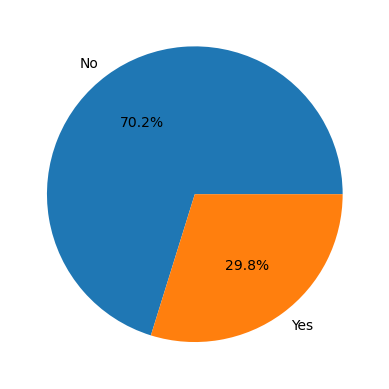

In [7]:
classes_cnt = df["Loan_Approved"].value_counts()
plt.pie(classes_cnt, labels=["No","Yes"], autopct = "%1.1f%%")
## This plot shows that for how many candidates loan got approved

[Text(0, 0, '621'), Text(0, 0, '379')]

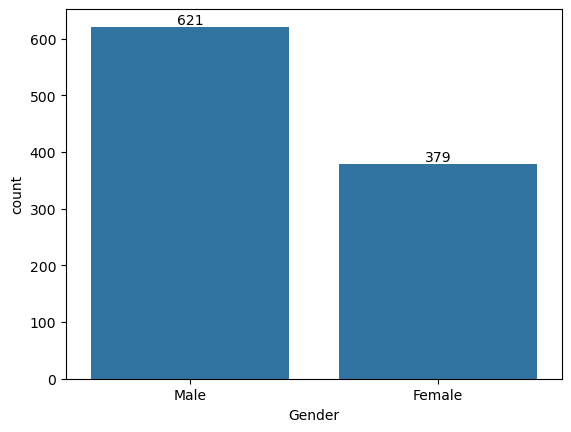

In [8]:
#category Evaluation

gender_count = df["Gender"].value_counts()

ax = sns.barplot(gender_count)
ax.bar_label(ax.containers[0])

[Text(0, 0, '722'), Text(0, 0, '278')]

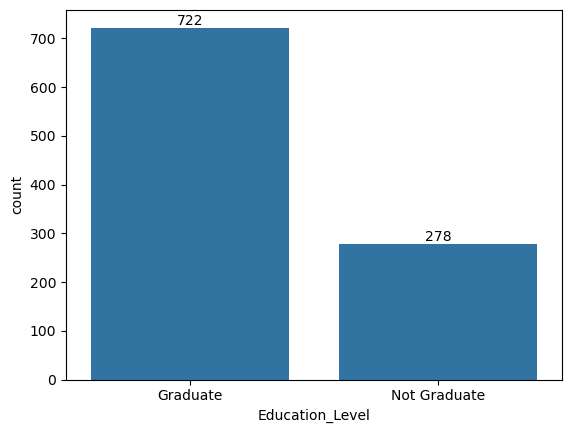

In [9]:
edu_Level = df["Education_Level"].value_counts()

ax = sns.barplot(edu_Level)
ax.bar_label(ax.containers[0])

[Text(0, 0, '515'), Text(0, 0, '213'), Text(0, 0, '182'), Text(0, 0, '90')]

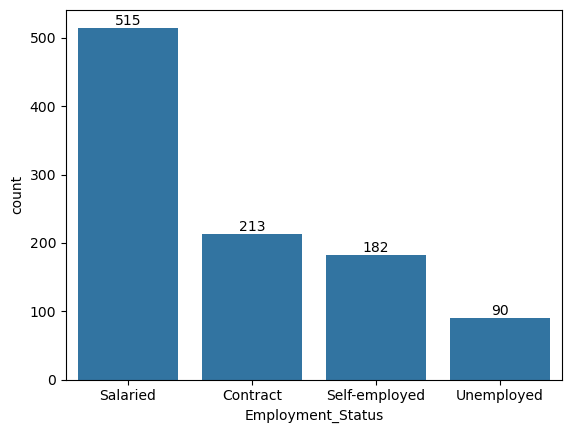

In [10]:
emp_Status = df["Employment_Status"].value_counts()

ax = sns.barplot(emp_Status)
ax.bar_label(ax.containers[0])

<Axes: xlabel='Applicant_Income', ylabel='Count'>

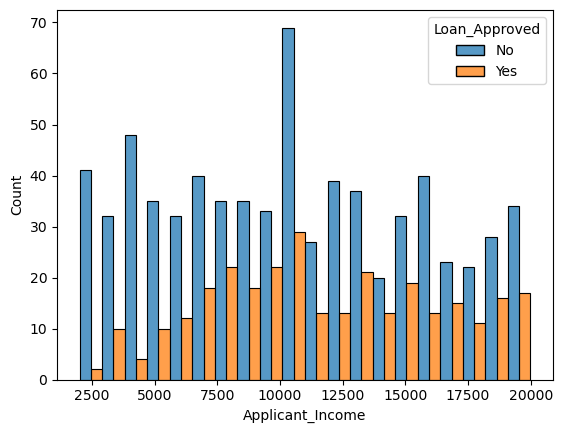

In [11]:
# Relation between Applicant Income and Loan Approved

sns.histplot(
    data= df,
    x= "Applicant_Income",
    bins = 20,
    hue= "Loan_Approved",
    multiple = "dodge"
)

<Axes: xlabel='Credit_Score', ylabel='Count'>

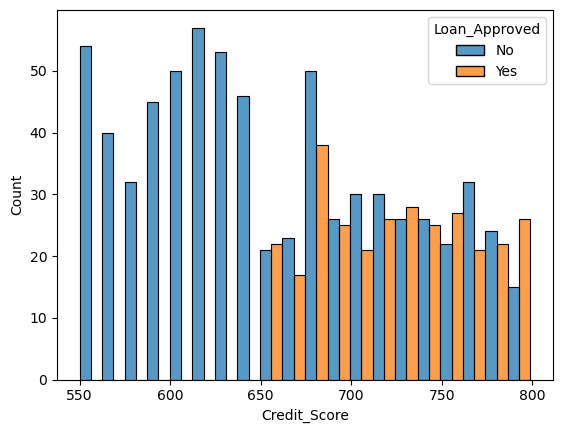

In [12]:
# Relation between Credit Score and Loan Approved

sns.histplot(
    data= df,
    x= "Credit_Score",
    bins = 20,
    hue= "Loan_Approved",
    multiple = "dodge"
)
# Data shows that high credit score leads to high approval rate

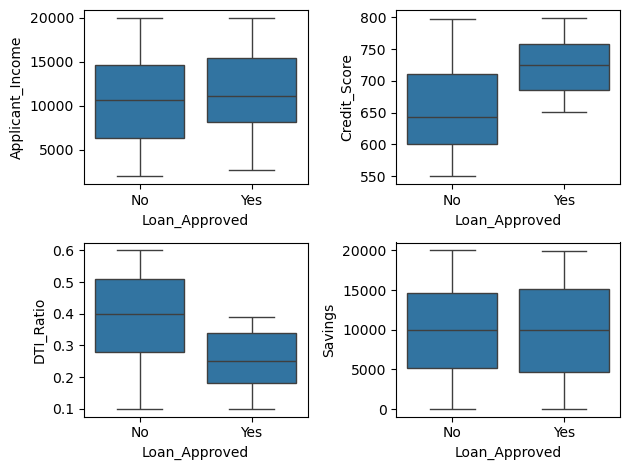

In [13]:
# Outlier Detection

fig, axes = plt.subplots(2,2)

sns.boxplot(ax= axes[0,0], data = df, x= "Loan_Approved", y = "Applicant_Income")
sns.boxplot(ax= axes[0,1], data = df, x= "Loan_Approved", y = "Credit_Score")
sns.boxplot(ax= axes[1,0], data = df, x= "Loan_Approved", y = "DTI_Ratio")
sns.boxplot(ax= axes[1,1], data = df, x= "Loan_Approved", y = "Savings")

plt.tight_layout()

### Feature Encoding

In [14]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder

df.drop("Applicant_ID",axis = 1)

cols = ["Employment_Status", "Marital_Status","Loan_Purpose","Property_Area","Gender","Employer_Category"]

le = LabelEncoder()
df["Education_Level"] = le.fit_transform(df["Education_Level"])
df["Loan_Approved"] = le.fit_transform(df["Loan_Approved"])

ohe = OneHotEncoder(drop="first", handle_unknown = "ignore", sparse_output=False)

encoded = ohe.fit_transform(df[cols])

encoded_df = pd.DataFrame(encoded, columns = ohe.get_feature_names_out(cols),index = df.index)
df = pd.concat([encoded_df,df.drop(columns=df[cols])], axis = 1)
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 29 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Employment_Status_Salaried       1000 non-null   float64
 1   Employment_Status_Self-employed  1000 non-null   float64
 2   Employment_Status_Unemployed     1000 non-null   float64
 3   Marital_Status_Single            1000 non-null   float64
 4   Loan_Purpose_Car                 1000 non-null   float64
 5   Loan_Purpose_Education           1000 non-null   float64
 6   Loan_Purpose_Home                1000 non-null   float64
 7   Loan_Purpose_Personal            1000 non-null   float64
 8   Property_Area_Semiurban          1000 non-null   float64
 9   Property_Area_Urban              1000 non-null   float64
 10  Gender_Male                      1000 non-null   float64
 11  Employer_Category_Government     1000 non-null   float64
 12  Employer_Category_MNC

### Correlation Heatmap

In [15]:
df.corr()["Loan_Approved"].sort_values(ascending=False)

Loan_Approved                      1.000000
Credit_Score                       0.451175
Applicant_Income                   0.119796
Employer_Category_MNC              0.069049
Loan_Purpose_Personal              0.034043
Marital_Status_Single              0.030182
Property_Area_Urban                0.025963
Collateral_Value                   0.021868
Coapplicant_Income                 0.004230
Loan_Purpose_Home                  0.002118
Employment_Status_Self-employed   -0.001337
Employer_Category_Private         -0.003347
Applicant_ID                      -0.011167
Property_Area_Semiurban           -0.012967
Savings                           -0.013437
Loan_Purpose_Education            -0.016684
Employer_Category_Unemployed      -0.021468
Age                               -0.022343
Dependents                        -0.023811
Existing_Loans                    -0.034794
Employer_Category_Government      -0.039187
Employment_Status_Salaried        -0.041428
Employment_Status_Unemployed    

<Axes: >

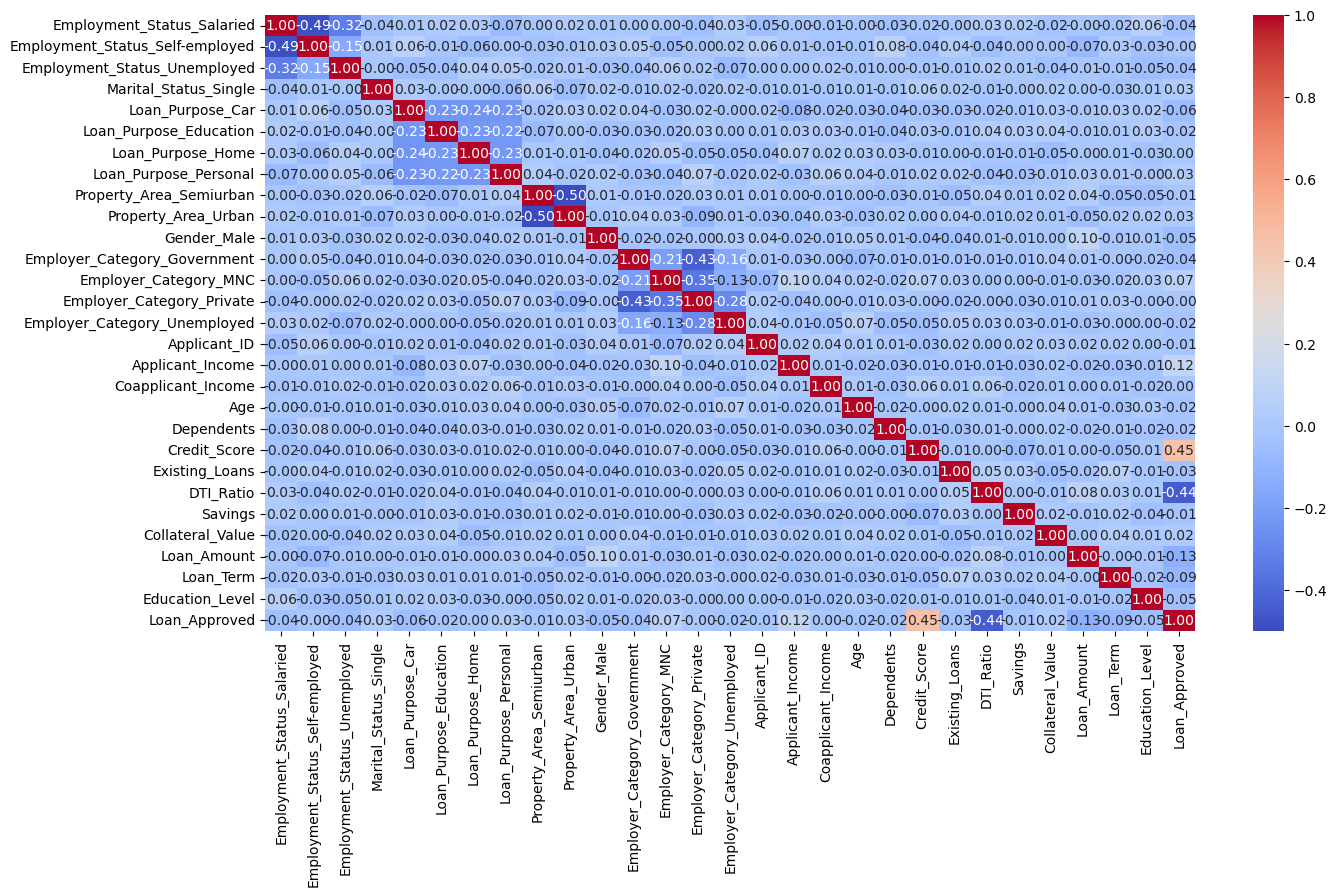

In [16]:
plt.figure(figsize=(15,8))
sns.heatmap(
    df.corr(),
    annot = True,
    fmt = ".2f",
    cmap="coolwarm"
)

## Train Test Split and Feature Engineering

In [17]:
X = df.drop("Loan_Approved",axis = 1)
y = df["Loan_Approved"]

X_train,X_test,y_train,y_test = train_test_split(X,y, test_size = 0.2, random_state =42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


## Train & Evaluate Models

### Logistic Regression

In [18]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score

log_model = LogisticRegression()
log_model.fit(X_train_scaled, y_train)

y_pred = log_model.predict(X_test_scaled)

# Evaluation
print("Logistic Regression Model")
print("Precision: ", precision_score(y_test, y_pred))
print("Recall: ", recall_score(y_test, y_pred))
print("F1 score: ", f1_score(y_test, y_pred))
print("Accuracy: ", accuracy_score(y_test, y_pred))
print("CM: ", confusion_matrix(y_test, y_pred))

Logistic Regression Model
Precision:  0.7868852459016393
Recall:  0.7868852459016393
F1 score:  0.7868852459016393
Accuracy:  0.87
CM:  [[126  13]
 [ 13  48]]


## KNN

In [19]:

from sklearn.neighbors import KNeighborsClassifier

knn_model = KNeighborsClassifier(n_neighbors=5)
knn_model.fit(X_train_scaled, y_train)

y_pred = knn_model.predict(X_test_scaled)

# Evaluation
print("KNN Model")
print("Precision: ", precision_score(y_test, y_pred))
print("Recall: ", recall_score(y_test, y_pred))
print("F1 score: ", f1_score(y_test, y_pred))
print("Accuracy: ", accuracy_score(y_test, y_pred))
print("CM: ", confusion_matrix(y_test, y_pred))

KNN Model
Precision:  0.5957446808510638
Recall:  0.45901639344262296
F1 score:  0.5185185185185185
Accuracy:  0.74
CM:  [[120  19]
 [ 33  28]]


## Naive Bayes

In [20]:

from sklearn.naive_bayes import GaussianNB

nb_model = GaussianNB()
nb_model.fit(X_train_scaled, y_train)

y_pred = nb_model.predict(X_test_scaled)

# Evaluation
print("Naive Bayes Model")
print("Precision: ", precision_score(y_test, y_pred))
print("Recall: ", recall_score(y_test, y_pred))
print("F1 score: ", f1_score(y_test, y_pred))
print("Accuracy: ", accuracy_score(y_test, y_pred))
print("CM: ", confusion_matrix(y_test, y_pred))



Naive Bayes Model
Precision:  0.8035714285714286
Recall:  0.7377049180327869
F1 score:  0.7692307692307693
Accuracy:  0.865
CM:  [[128  11]
 [ 16  45]]


# Best Model on the basis of Precision => Naive Bayes

## Feature Engineering

In [21]:
# Add or Tranform features
df["DTI_Ratio_sq"] = df["DTI_Ratio"] ** 2
df["Credit_Score_sq"] = df["Credit_Score"] ** 2

# df["Applicant_Income_log"] = np.log1p(df["Applicant_Income"])

X = df.drop(columns=["Loan_Approved", "Credit_Score", "DTI_Ratio"])
y = df["Loan_Approved"]

# Train test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scaling
scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [22]:
# Logistic regression After Feature Engineering

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score

log_model = LogisticRegression()
log_model.fit(X_train_scaled, y_train)

y_pred = log_model.predict(X_test_scaled)

# Evaluation
print("Logistic Regression Model")
print("Precision: ", precision_score(y_test, y_pred))
print("Recall: ", recall_score(y_test, y_pred))
print("F1 score: ", f1_score(y_test, y_pred))
print("Accuracy: ", accuracy_score(y_test, y_pred))
print("CM: ", confusion_matrix(y_test, y_pred))

Logistic Regression Model
Precision:  0.7903225806451613
Recall:  0.8032786885245902
F1 score:  0.7967479674796748
Accuracy:  0.875
CM:  [[126  13]
 [ 12  49]]


In [23]:
# KNN After Feature Engineering

from sklearn.neighbors import KNeighborsClassifier

knn_model = KNeighborsClassifier(n_neighbors=5)
knn_model.fit(X_train_scaled, y_train)

y_pred = knn_model.predict(X_test_scaled)

# Evaluation
print("KNN Model")
print("Precision: ", precision_score(y_test, y_pred))
print("Recall: ", recall_score(y_test, y_pred))
print("F1 score: ", f1_score(y_test, y_pred))
print("Accuracy: ", accuracy_score(y_test, y_pred))
print("CM: ", confusion_matrix(y_test, y_pred))

KNN Model
Precision:  0.5957446808510638
Recall:  0.45901639344262296
F1 score:  0.5185185185185185
Accuracy:  0.74
CM:  [[120  19]
 [ 33  28]]


In [24]:
# Naive Bayes After Feature Engineering

from sklearn.naive_bayes import GaussianNB

nb_model = GaussianNB()
nb_model.fit(X_train_scaled, y_train)

y_pred = nb_model.predict(X_test_scaled)

# Evaluation
print("Naive Bayes Model")
print("Precision: ", precision_score(y_test, y_pred))
print("Recall: ", recall_score(y_test, y_pred))
print("F1 score: ", f1_score(y_test, y_pred))
print("Accuracy: ", accuracy_score(y_test, y_pred))
print("CM: ", confusion_matrix(y_test, y_pred))

Naive Bayes Model
Precision:  0.7966101694915254
Recall:  0.7704918032786885
F1 score:  0.7833333333333333
Accuracy:  0.87
CM:  [[127  12]
 [ 14  47]]


# After Feature engineering Best Model on the basis of Precision => Naive Bayes